# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression 

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [1]:
# Import and rename libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.2 - Data Preparation ##

Prepare the data for regression task. **(20 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.

![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

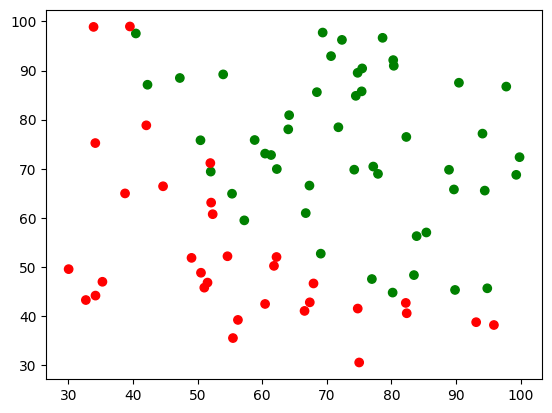

In [4]:
df = pd.read_csv('data_logistic.csv')
x1 = df.iloc[:, 0]
x2 = df.iloc[:, 1]
label = df.iloc[:, 2]

# scatterplot
colors_map = {0: 'red', 1: 'green'}
plt.scatter(x1, x2, c=[colors_map[i] for i in label])
plt.show()


### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(20 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X). 

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

In [5]:
# Implement sigmoid fuction her
def sigmoid(z):
  return 1/(1 + np.exp(-z))


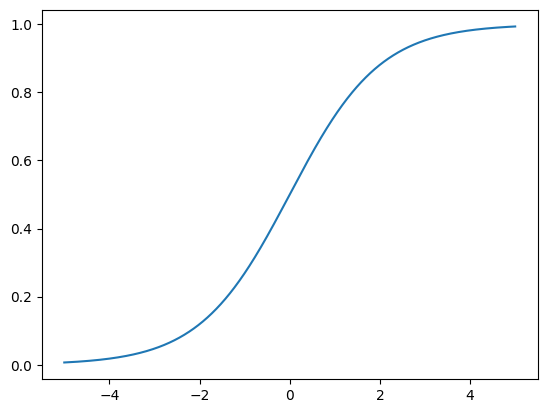

In [6]:
# Plot data here
X = np.linspace(-5, 5, 1000)
Y = sigmoid(X)

plt.plot(X, Y)



### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(30 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):
 
        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2) 
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1 
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [12]:
# Implement the cost function here
def cal_cost(theta, x, y):
  m,n=x.shape
  htheta = x.dot(theta)
  eps = 1e-15
  term1 = np.dot(np.log(sigmoid(htheta)), y)
  term2 = np.dot(np.log(1-sigmoid(htheta)+eps), 1 - y)
  cost = - 1 / m * (term1 + term2) 
  return cost

def cal_grad(theta, x, y):
    m,n=x.shape
    htheta = x.dot(theta)
    term1 = np.dot(np.transpose(x), (sigmoid(htheta) - y))
    grad = 1 / m * term1 
    return grad

m, n = df.shape
x1 = df.iloc[:, 0:2]
x1 = np.hstack((np.ones((m,1)), x1))
y = df.iloc[:, 2]
theta = np.zeros(n)

print(cal_cost(theta,x1,y))

print(cal_grad(theta,x1,y))







0.6931471805599445
[ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(15 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample: 

![](https://drive.google.com/uc?export=view&id=1xLg9LrIF888gGXj3zRAG9iJLsyAmgPQg)

5. It may take ~1 min to finish running.

In [21]:
# Gradient Descent Implementation Here
L = .001  # The learning Rate
epochs = 80000  # The number of iterations to perform gradient descent

df = pd.read_csv('data_logistic.csv')
th = np.zeros(n)
x11 = df.iloc[:, 0]
x22 = df.iloc[:, 1]
label = df.iloc[:, 2]
m, n =df.shape
x1 = df.iloc[:, 0:2]
x1 = np.hstack((np.ones((m,1)), x1))
y = df.iloc[:, 2]

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = sigmoid(th[0] + th[1]*x11 + th[2]*x22)  # The current predicted value of Y
    D_t0 = (-1/m) * sum((label - Y_pred))  # Derivative wrt t0
    D_t1 = (-1/m) * sum(x11 * (label - Y_pred))  # Derivative wrt t1
    D_t2 = (-1/m) * sum(x22 * (label - Y_pred))  # Derivative wrt t2

    th[0] = th[0] - L * D_t0  # Update t0
    th[1] = th[1] - L * D_t1  # Update t1
    th[2] = th[2] - L * D_t2  # Update t2
    if i < 6:
      print('t1: {}, t2: {}, t3: {}'.format(th[0], th[1], th[2]))
      print(cal_cost(th,x1,label))

t1: 0.0001, t2: 0.010912420264687502, t3: 0.011736529367687501
0.6996118077359638
t1: -0.00011290115939107449, t2: 0.0005394858872005415, t3: 0.0022935225185411034
0.6649331468590681
t1: -5.936049562705578e-05, t2: 0.008331458731803437, t3: 0.010775432430364745
0.667991436499246
t1: -0.00023560464124739241, t2: 0.000460700998996302, t3: 0.0037082931344059305
0.6545873034874964
t1: -0.000203629894599088, t2: 0.006832274859499039, t3: 0.010651382953816985
0.6563302142684528
t1: -0.00036119747856856873, t2: 0.0002645013079088888, t3: 0.004780066498178846
0.6488500464051156


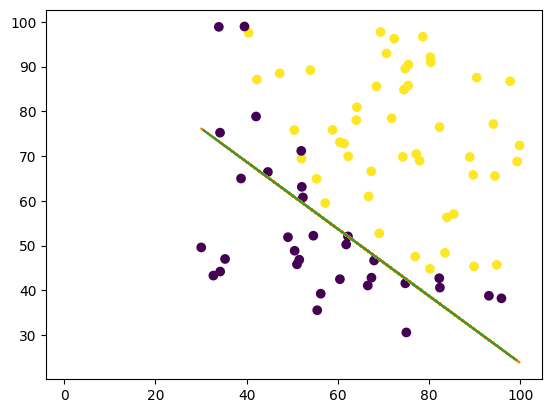

In [22]:
# Draw Decision Boundary Here
# Plot data here
yplt=(th[1]*x1+ th[0])/ -th[2]
plt.scatter(data=df, x="x1", y="x2", c=df["label"])
plt.plot(x1, yplt)
plt.show()


### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(15 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5). 
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [28]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred2= Y_pred.round()
ac = accuracy_score(y_pred2, y)
print(ac)

print(sigmoid(th[0] + 56*th[1] + 32*th[2]))


0.85
0.27426661618176124
